In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision
from torchvision import transforms


from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trainset = torchvision.datasets.FashionMNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

In [3]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True,num_workers=4)

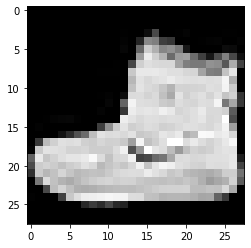

In [4]:
# 資料集繪圖
img = np.rollaxis(trainset[0][0].numpy(),0,3)
img = np.reshape(img,(28,28))
plt.imshow(img,cmap='gray')

In [14]:
def generate_gaussian_noise(latent_dim):
    
    noise = np.random.normal(0, 1, (img.shape[0], latent_dim))
    noise = torch.from_numpy(noise).float().cuda()
    
    return noise

In [5]:
class Generator_Network(nn.Module):
    
    def __init__(self, latent_dim = 128):
        super(Generator_Network,self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(latent_dim,256),
            nn.Linear(256,512),
            nn.Linear(512, 28*28),
            nn.Tanh()
        )
        
    def forward(self,x):
        tmp = self.generator(x)
        tmp = tmp.view(-1,1,28,28)
        return tmp

In [6]:
class Discriminator_Network(nn.Module):
    
    def __init__(self):
        super(Discriminator_Network,self).__init__()
        self.discriminator = nn.Sequential(
            nn.Linear(28*28,512),
            nn.Linear(512,256),
            nn.Linear(256,1),
            nn.Sigmoid()
        )
        
    def forward(self,x):
        tmp = x.view(-1,28*28)
        tmp = self.discriminator(tmp)
        return tmp

In [7]:
gen = Generator_Network().cuda()
dis = Discriminator_Network().cuda()

In [8]:
criterion = nn.BCELoss()
optim_G = torch.optim.Adam(gen.parameters())
optim_D = torch.optim.Adam(dis.parameters())

In [9]:
epoches = 20

In [18]:
gen.train()
dis.train()
for e in range(epoches):
    running_loss_G = 0.0
    running_loss_D = 0.0
    for data in tqdm(trainloader):
        img, label = data
        img = img.cuda()

        valid = torch.ones(img.size(0), 1).cuda()
        fake = torch.zeros(img.size(0), 1).cuda()
        
        noise = generate_gaussian_noise(128)
        
        optim_G.zero_grad()
        gen_img = gen(noise)
        g_loss = criterion(dis(gen_img), valid)
        g_loss.backward()
        optim_G.step()
        running_loss_G+=g_loss.item()

        optim_D.zero_grad()
        real_loss = criterion(dis(img), valid)
        fake_loss = criterion(dis(gen_img.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optim_D.step()
        running_loss_D+=d_loss.item()
        
    print(f'epoch {e+1}: D:{running_loss_D/len(trainset)} G:{running_loss_G/len(trainset)}')

  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 1: D:0.02101070263981819 G:0.026278423754374187


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 2: D:0.019666342022518317 G:0.032344727823138235


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 3: D:0.01965667751530806 G:0.03246094545324643


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 4: D:0.020610454381505647 G:0.02817903505762418


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 5: D:0.020065097644925117 G:0.030875287092725436


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 6: D:0.019174469175438087 G:0.03528909263809522


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 7: D:0.01952780907501777 G:0.03351663789351781


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 8: D:0.019510055122276146 G:0.03342530138790607


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 9: D:0.019066615451375644 G:0.03570423176685969


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 10: D:0.01933467213412126 G:0.03399268913070361


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 11: D:0.01955029067993164 G:0.03298694462974866


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 12: D:0.019260746003190676 G:0.03433847393095493


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 13: D:0.018527702124416828 G:0.038395718335111934


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 14: D:0.019277837874988716 G:0.03451106878320376


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 15: D:0.01925826146354278 G:0.03447588132123153


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 16: D:0.01731383159905672 G:0.044645947759350144


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 17: D:0.016888158691922825 G:0.047101357471942905


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 18: D:0.01721433260589838 G:0.044755439829826354


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 19: D:0.018746576725443203 G:0.037260319781303404


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:29<00:00, 64.53it/s]

epoch 20: D:0.01907158818443616 G:0.03581943595906099


In [20]:
# 區別是否為真實圖片
with torch.no_grad():
    gen.eval()
    dis.eval()
    hits = 0.0
    for data in trainloader:
        img, label = data
        img = img.cuda()
        
        hits+=dis(img).sum().item()
    print(hits/len(trainset))

0.6747552283922831


In [21]:
# 區別是否為合成圖片
with torch.no_grad():
    gen.eval()
    dis.eval()
    hits = 0.0
    for data in trainloader:
        img, label = data
        noise = np.random.normal(0,1,(32,128))
        noise = torch.from_numpy(noise).float().cuda()
        
        gen_img = gen(noise)
        hits+=dis(gen_img).sum().item()
    print(hits/len(trainset))

0.5077804422219594


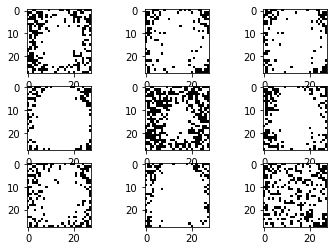

In [19]:
# 合成圖片
for i in range(3):
    for j in range(3):
        with torch.no_grad():
            gen.eval()
            noise = generate_gaussian_noise(128)

            gen_img = gen(noise).detach().cpu().numpy()
            gen_img = np.rollaxis(gen_img[0],0,3)
            gen_img = np.reshape(gen_img,(28,28))
            
            plt.subplot(3,3,1+i*3+j)
            plt.imshow(gen_img,cmap='gray')

In [13]:
torch.save(gen.state_dict(),'gan.pth')